In [1]:
import pandas as pd 
train_df = pd.read_csv("../new_data.csv")
train_df = train_df.drop(["id", "CustomerId"], axis=1)

* Define Problems:
1. Are users similar?
2. The most important feature

In [2]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from imblearn.over_sampling import RandomOverSampler
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# The Most Important Feature

In [3]:
class Processor:
    def onehot(df):
        object_df = df.select_dtypes(include=['object'])
        object_column = object_df.columns
        return df.drop(object_column, axis=1).join(pd.get_dummies(object_df, prefix=object_column))
        
    def split(df, title):
        return df.drop(title, axis=1), df[title]
    

* Data Processing

In [4]:
processed_train = Processor.onehot(train_df.copy()) 
processed_train.fillna(value=0, inplace=True)
r_train_x, r_test_x, r_train_y, r_test_y = train_test_split(*Processor.split(processed_train, "Exited"), test_size=.2)


* Modeling Building

In [ ]:
classifier = RandomForestClassifier(n_jobs=-1)
classifier.fit(r_train_x, r_train_y)

In [6]:
r_pred_y = classifier.predict(r_test_x)
accuracy_score(r_test_y, r_pred_y)

0.8601462522851919

In [14]:
feature_names = r_train_x.columns
feature_importance = classifier.feature_importances_
feature_importance_dict = dict(zip(feature_names, feature_importance))
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
first_element = [t[0] for t in sorted_features]
first_element[:15]

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Surname_Abazu',
 'Surname_Abbie',
 'Surname_Abbott',
 'Surname_Abdullah',
 'Surname_Abdulov',
 'Surname_Abel',
 'Surname_Abernathy']

# xgboost


In [18]:
xgclassifer = xgb.XGBClassifier()
xgclassifer.fit(r_train_x, r_train_y)
xg_pred_y = xgclassifer.predict(r_test_x)
accuracy_score(xg_pred_y, r_test_y)

0.8656878427787934

# Similar Users with KNN

* Important Features

In [ ]:
important_features = [element for element in first_element[:10] if "_" not in element] + ["Geography", "Gender", "Exited"]
important_features
raise Exception()

['Age',
 'NumOfProducts',
 'CreditScore',
 'EstimatedSalary',
 'Balance',
 'Tenure',
 'IsActiveMember',
 'Geography',
 'Gender',
 'Exited']

* Testing and Trainingg Data Collecting

In [ ]:
selected_train = train_df.drop("Surname", axis=1).copy()
selected_train = Processor.onehot(selected_train) 
selected_train.fillna(value=0, inplace=True)
knn_train_x, knn_test_x, knn_train_y, knn_test_y = train_test_split(*Processor.split(selected_train, "Exited"), test_size=.2)


In [ ]:

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(knn_train_x, knn_train_y)

KNeighborsClassifier()

In [ ]:
knn_predicted_y = knn_classifier.predict(knn_test_x)
confusion_matrix(knn_test_y, knn_predicted_y)

array([[25660,  2052],
       [ 6450,   846]], dtype=int64)

In [ ]:
accuracy_score(knn_test_y, knn_predicted_y)

0.7571412248628885

# Binary Classification

In [ ]:
data_map = {}
def ploting(title, k = - 1):
    plt.figure(figsize=(20, 8))

    # Assuming train_df is your DataFrame
    total_counts = train_df[title].value_counts().sort_index()

    # Calculate percentages for Exited=0
    exited_0 = train_df[train_df["Exited"] == 0][title].value_counts()
  

    # Calculate percentages for Exited=1
    exited_1 = train_df[train_df["Exited"] == 1][title].value_counts()
  

    # Combine percentages into a DataFrame
    combined_data = pd.DataFrame({'Exited_0': exited_0, 'Exited_1': exited_1})
    
    # Plot the joint bar chart
     
    if k != -1:
        combined_data_grouped = combined_data.groupby(pd.cut(total_counts.index, k, precision=0)).sum()
        combined_data_grouped = combined_data_grouped.div(combined_data_grouped.sum(axis=1), axis=0) * 100
    else:
        combined_data_grouped = combined_data.div(combined_data.sum(axis=1), axis=0) * 100
    # data_map[title] = combined_data_grouped
    temp_map = {}
    if (combined_data_grouped['Exited_0'] < 5).any():
        temp_map["Exited_1"] = combined_data_grouped[combined_data_grouped['Exited_0'] < 5].index.to_list()
    elif (combined_data_grouped['Exited_1'] < 5).any():
        temp_map['Exited_0'] = combined_data_grouped[combined_data_grouped['Exited_1'] < 5].index.to_list()
    data_map[title] = temp_map
    combined_data_grouped.sort_index().plot(kind='bar', figsize=(20, 8))

    plt.title(f'Percentage of {title} Distribution for Exited = 0 and Exited = 1')
    plt.xlabel(title)
    plt.ylabel('Percentage')
    plt.show()

<Figure size 2000x800 with 0 Axes>

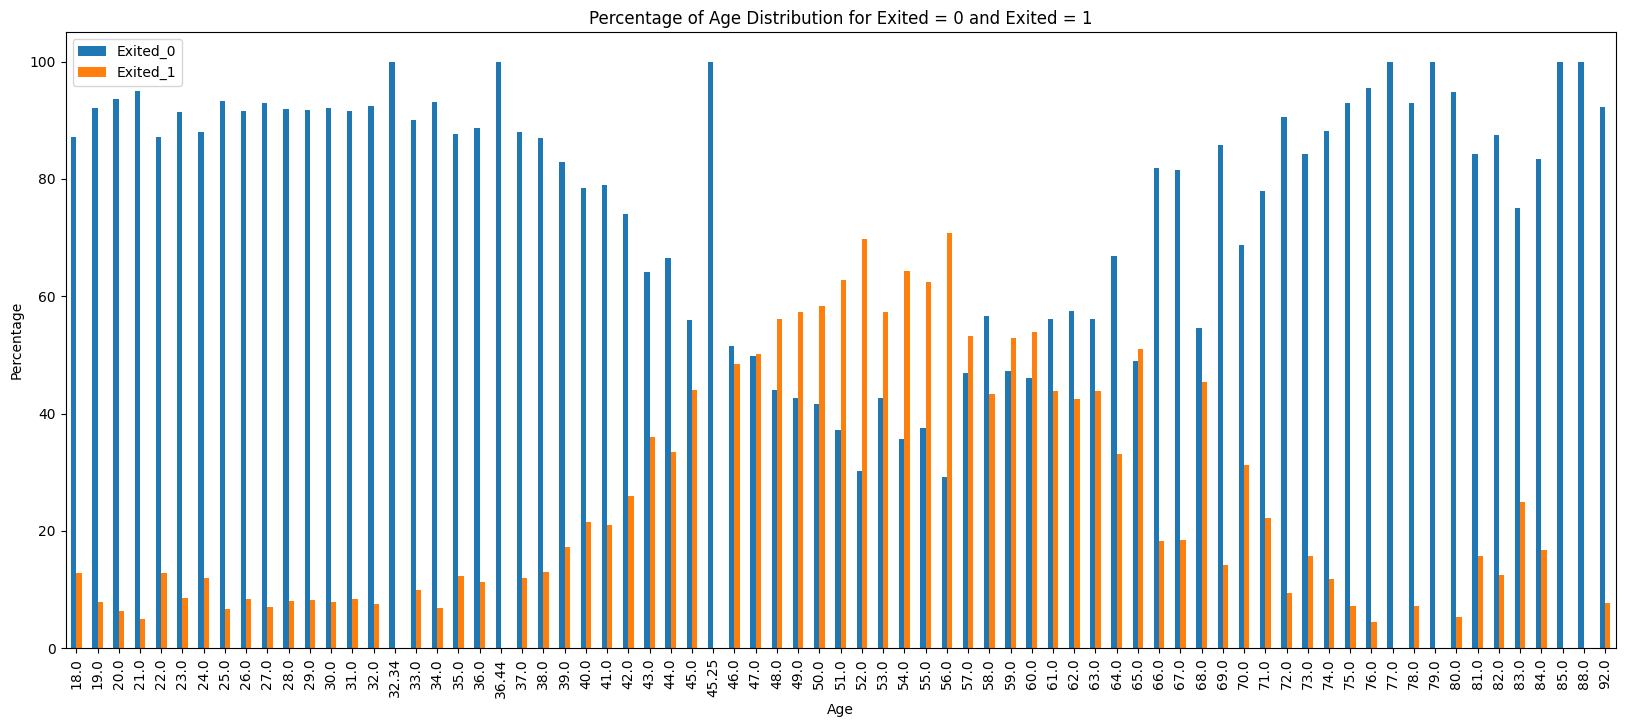

<Figure size 2000x800 with 0 Axes>

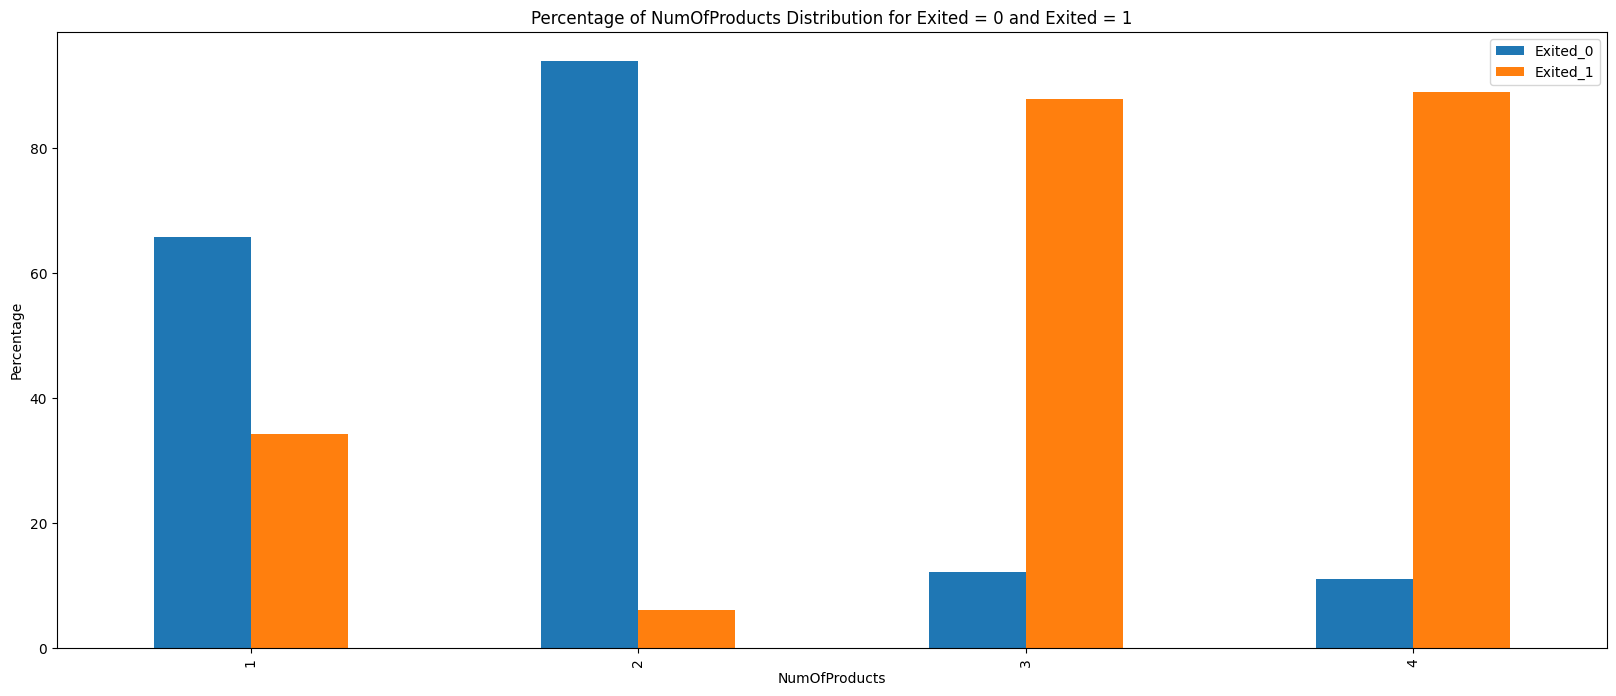

<Figure size 2000x800 with 0 Axes>

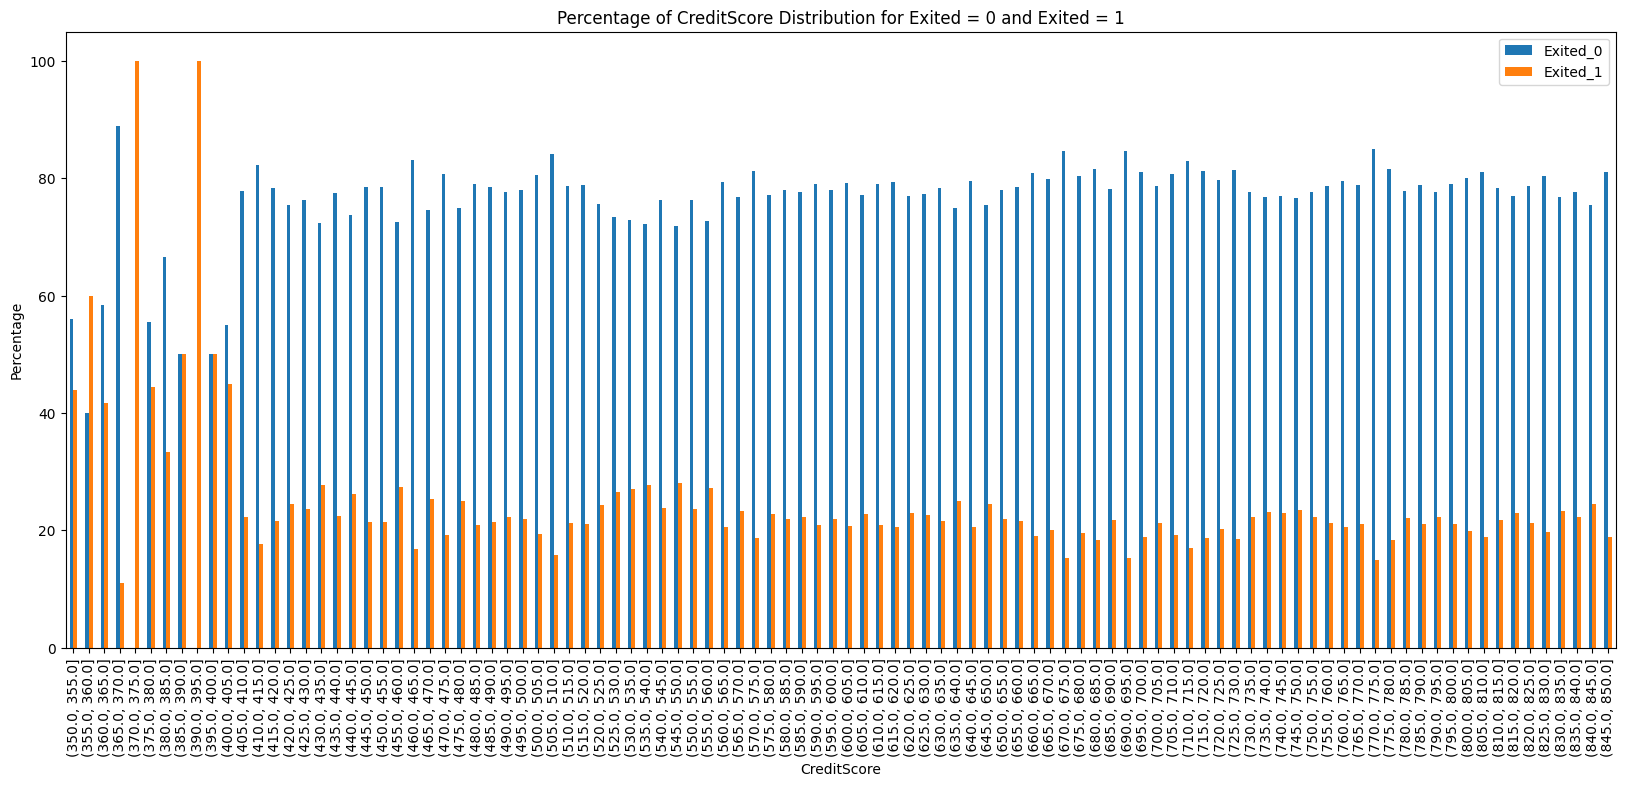

<Figure size 2000x800 with 0 Axes>

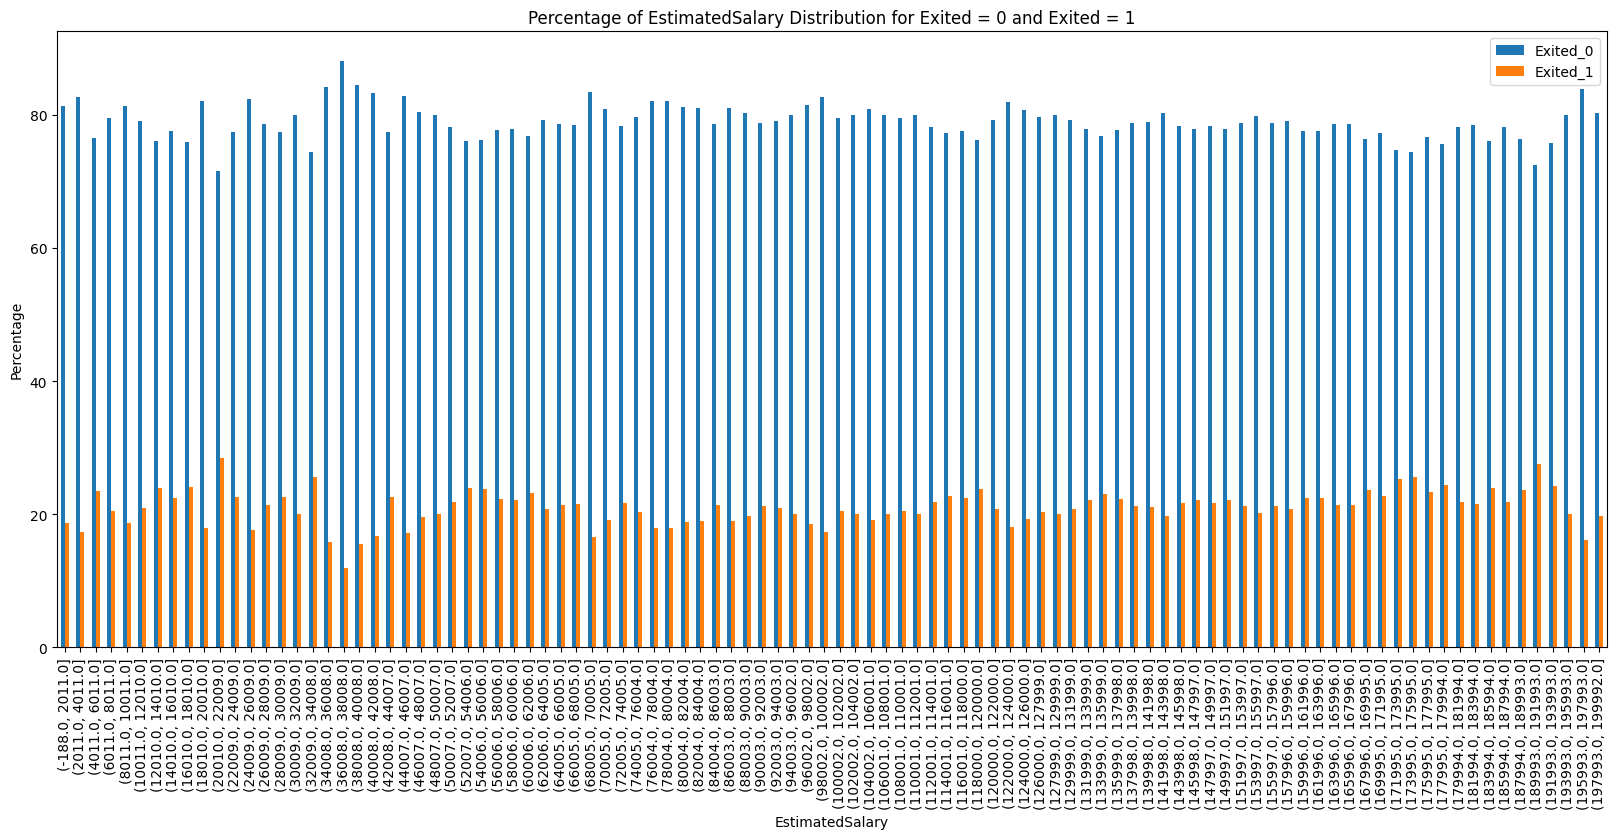

<Figure size 2000x800 with 0 Axes>

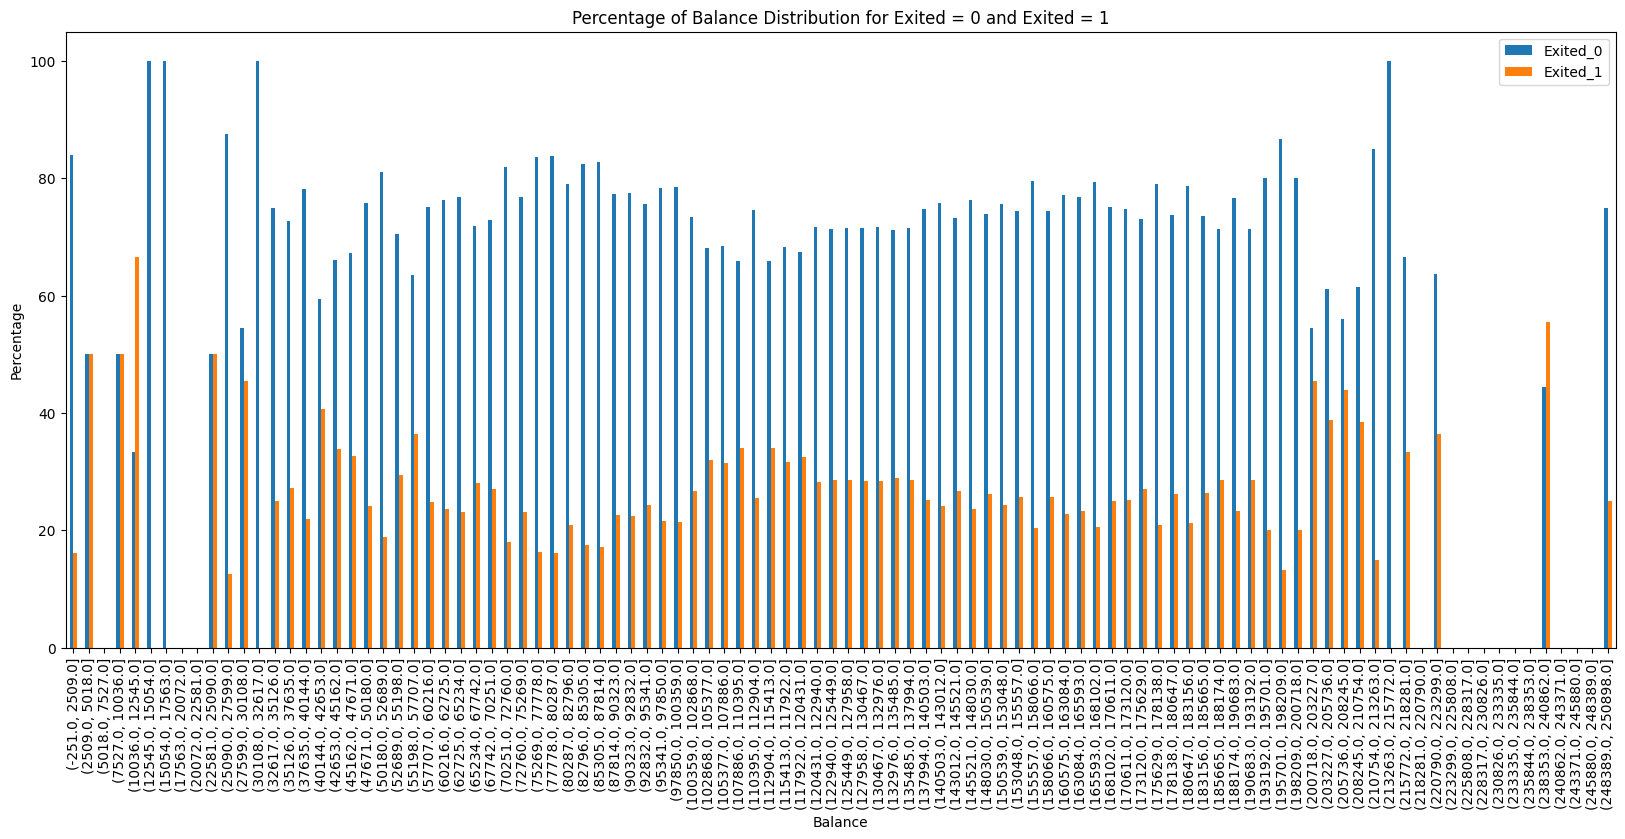

<Figure size 2000x800 with 0 Axes>

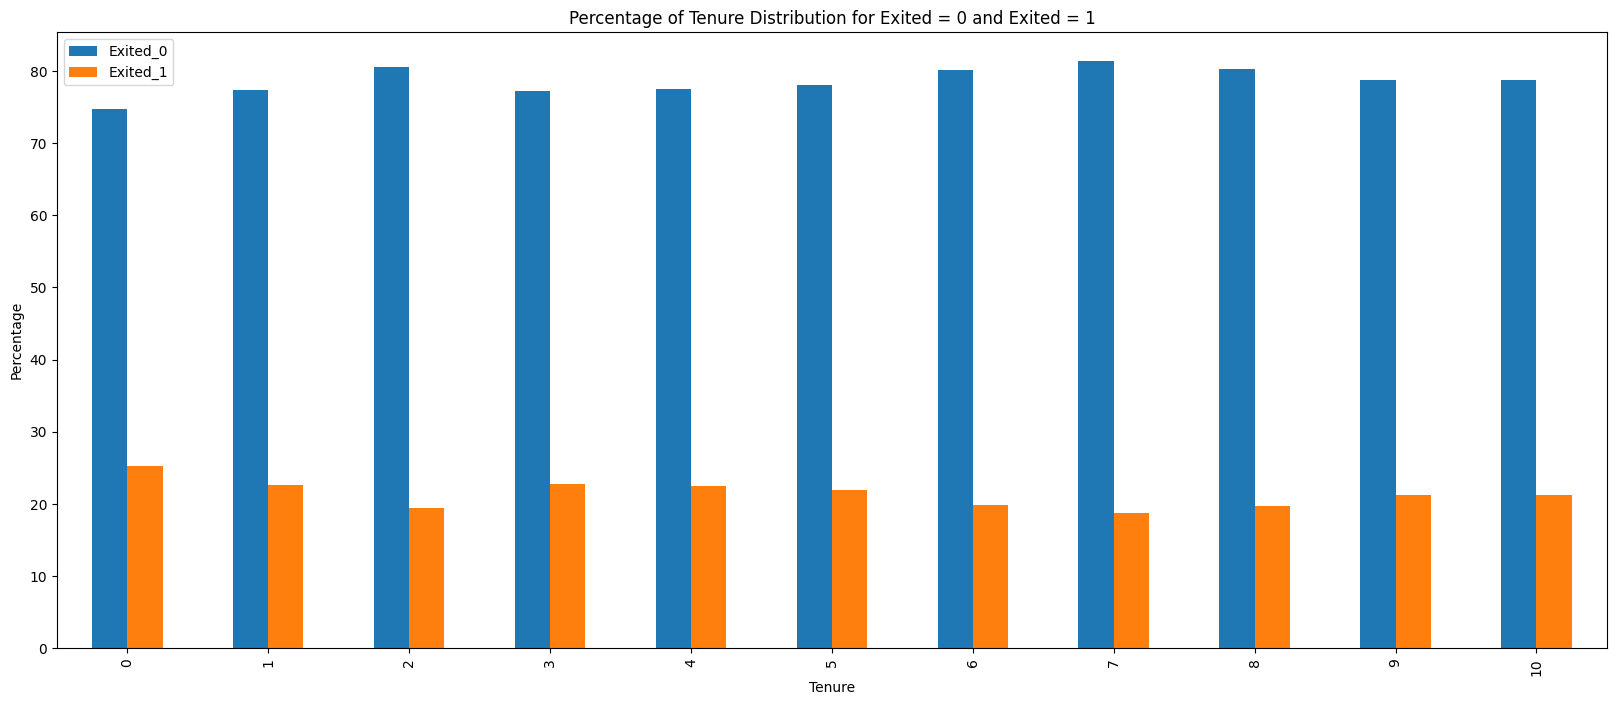

<Figure size 2000x800 with 0 Axes>

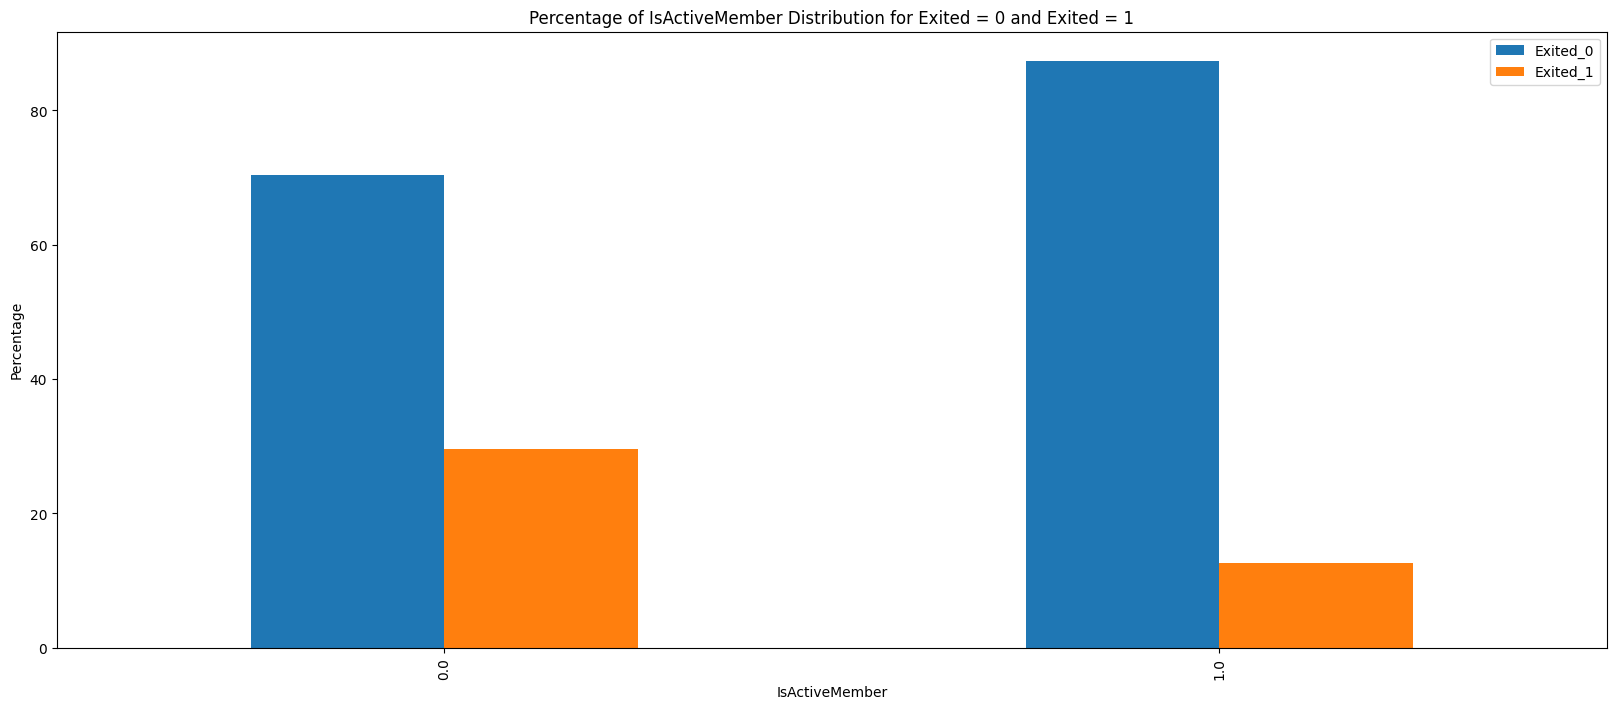

In [ ]:
title_list = first_element[:10]
for element in title_list:
    if element in train_df.columns:
        size = train_df[element].value_counts().shape[0]
        ploting(element, k = 100 if size >= 100 else -1)

In [19]:
train_df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

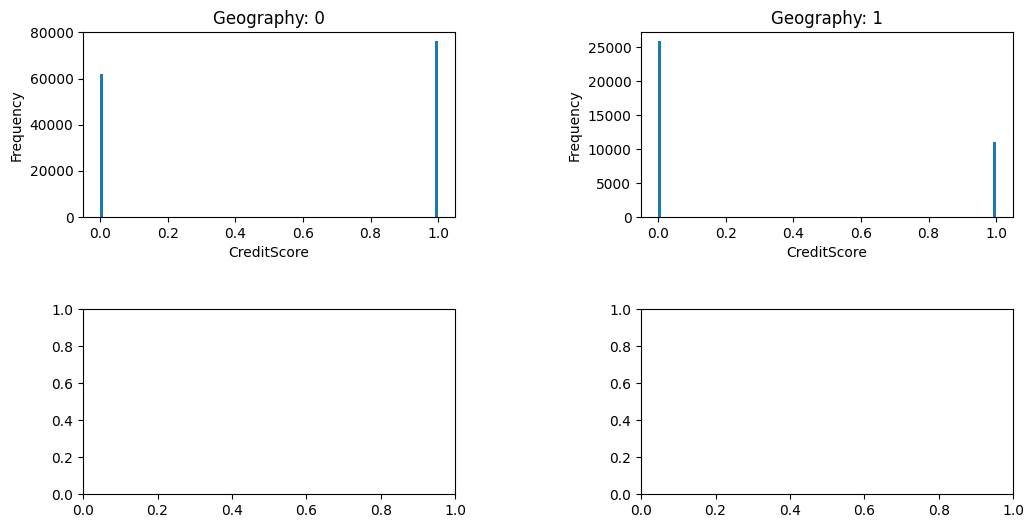

In [23]:

# Assuming train_df is your DataFrame
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
plt.subplots_adjust(hspace=.5, wspace=.5)

# Enumerate over groups based on "Geography"
for idx, (geography, data) in enumerate(train_df.groupby("Exited")):
    # Correcting the index calculation
    index = idx
    subplot = axes[index // 2, index % 2]
    
    # Using pd.cut to create bins for histogram
    bins = 100
    value_count = data["IsActiveMember"]
    value_count_binned = pd.cut(value_count, bins=bins)
    
    # Plotting histogram
    subplot.hist(value_count, bins=bins)
    
    # Adding labels and title
    subplot.set_title(f"Geography: {geography}")
    subplot.set_xlabel("CreditScore")
    subplot.set_ylabel("Frequency")

plt.show()


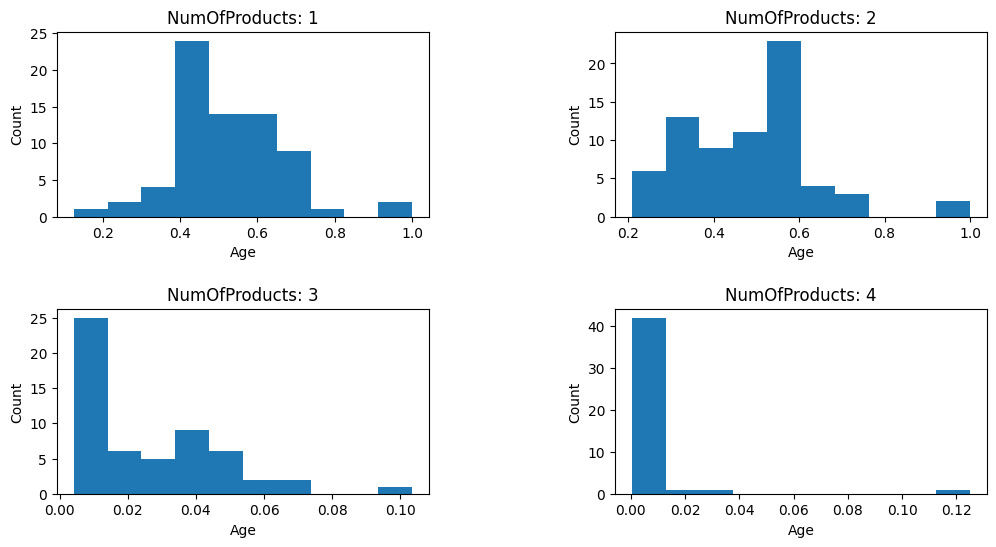

In [16]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
total_count = train_df['Age'].value_counts().sort_index()
plt.subplots_adjust(hspace=.5, wspace=.5)
for idx, data in train_df.groupby("NumOfProducts"):
    index = idx - 1
    subplot = axes[index // 2, index % 2]
    value_count = data['Age'].value_counts().sort_index() / total_count
    
    subplot.hist(value_count)
    subplot.set_title(f"NumOfProducts: {idx}")
    subplot.set_xlabel("Age")
    subplot.set_ylabel("Count")

## Conclusion
* We can leverage a map to filter some data with that features

In [ ]:
def model(df):
    age = df['Age']
    answer = 0
    if age < 56 and age > 48:
        answer = 1
    return answer
ans_df = pd.read_csv("../test.csv")
answer = ans_df.apply(model, axis=1)